# Graphical analysis of the American Community Survey

This notebook demonstrates several types of statistical graphs that can be used to gain insight into the American Community Survey (ACS) data.  You should review the "acs_basic.ipynb" notebook first before studying this notebook.  Also, the data documentation and codebook that you will need to understand the data are here: https://www.census.gov/programs-surveys/acs/technical-documentation/pums/documentation.html.

The code in the following two cells imports the libraries that we need and loads the data.  You may need to change the value of the variable named "f" below, based on the section of the course in which you are enrolled.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
f = "stats206s002f21"
base = "/scratch/%s_class_root/%s_class/shared_data/datasets" % (f, f)
df = pd.read_csv(os.path.join(base, "pums_short.csv.gz"))

To review the structure of the data, we can do the following:

In [3]:
print(df.columns)
print(df.shape)

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')
(276632, 31)


## Boxplots and histograms

A boxplot is a way to visualize a distribution. Below we create a boxplot for the household income variable in the ACS.

<AxesSubplot:ylabel='HINCP'>

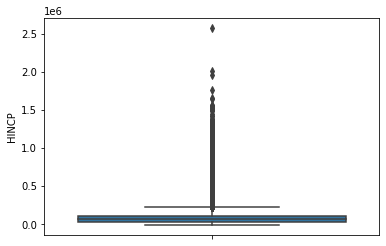

In [4]:
sns.boxplot(y="HINCP", data=df)

The data are very skewed, which is a common property of income data.  Skew is not a bad thing, but it is an important characteristic of the data to be aware of.

Here is an alternative way of displaying the boxplot.

[(-50000.0, 250000.0)]

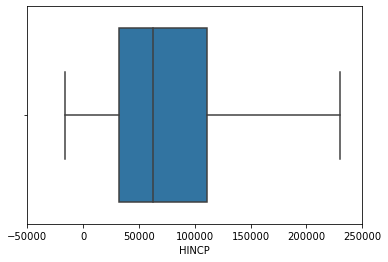

In [5]:
ax = sns.boxplot(x="HINCP", fliersize=0, data=df)
ax.set(xlim=[-50000, 250000])

By inspecting the middle section of the boxplot above, we see the evidence for skew in the income data (the right section of the box is wider than the left section of the box, and the right whisker extends further than the left whisker).

A histogram is another way to visualize a distribution. It requires more data to produce an accurate histogram than it does to produce an accurate boxplot, but in this case we have plenty of data so either approach is useful.  There are various ways to decide how many bins to use when creating a histogram.  Here we set this value manually to have 20 bins.

<AxesSubplot:xlabel='HINCP', ylabel='Count'>

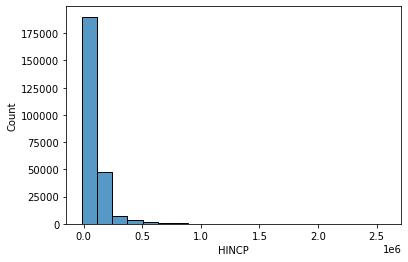

In [6]:
sns.histplot(data=df["HINCP"], bins=20)

Next we log transform the data, after dropping all observations with less than 1 unit of income (so that we do not end up taking logs of non-positive values).  A boxplot reveals that the log transformed income has a more symmetrical (less skewed) shape than the raw income values.  Skew isn't necessarily bad and is not something that always must be removed.  But in general it is easier to analyze data that has been transformed to reduce the skew.

<ipython-input-7-034cda958f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["logHINCP"] = np.log2(dx["HINCP"])


<AxesSubplot:ylabel='logHINCP'>

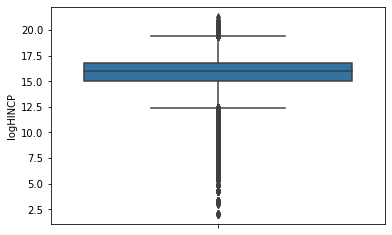

In [7]:
dx = df.loc[df["HINCP"] >= 1, :]
dx["logHINCP"] = np.log2(dx["HINCP"])
sns.boxplot(y="logHINCP", data=dx)

Here is a histogram of the log transformed income data.

<AxesSubplot:xlabel='logHINCP', ylabel='Count'>

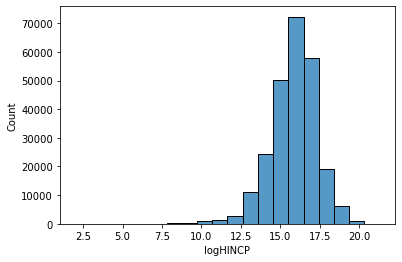

In [8]:
sns.histplot(data=dx["logHINCP"], bins=20)

It is almost always more interesting to compare distributions across meaningful subgroups, rather than to inspect one distribution in isolation.  Below we use boxplots to compare the distributions of income in four regions of the US (see the codebook to learn how the numbers 1-4 correspond to geographic regions of the US).  Based on this plot, there is not a dramatic difference in the overall income distribution among regions.  However note that a 1 unit change of log income corresponds to a doubling of the actual income in dollars, so small differences in log transformed data can be quite meaningful.

<AxesSubplot:xlabel='REGION', ylabel='logHINCP'>

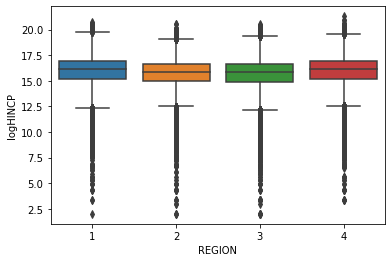

In [9]:
sns.boxplot(x="REGION", y="logHINCP", data=dx)

To make it easier to see small differences in the income distributions among the regions, we can eliminate the "fliers" and enlarge the center part of the plot. Now we see that people in regions 1 and 4 tend to have slightly greater incomes than people in regions 2 and 3.  Nevertheless, there is far more variation of incomes within regions than there is between regions.

[(12.0, 20.0)]

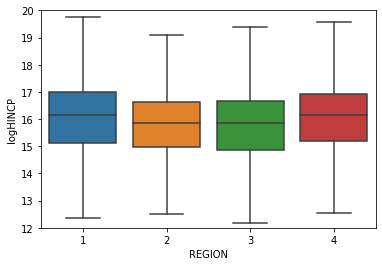

In [10]:
ax = sns.boxplot(x="REGION", y="logHINCP", fliersize=0, data=dx)
ax.set(ylim=[12, 20])

Next we will inspect a different variable, "RNTP", which contains the monthly rent paid for the primary dwelling of the household.  This variable is missing for people who do not rent their place of residence.  Seaborn automatically excludes these values when plotting.

<AxesSubplot:xlabel='RNTP', ylabel='Count'>

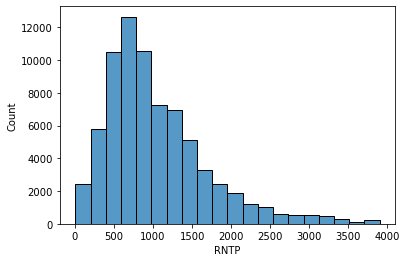

In [11]:
sns.histplot(df["RNTP"], bins=20)

Next we compare the distributions of rents between geographical regions.  These differences are stronger than the differences in income that we explored above.  Rents are lower in regions 2 and 3 compared to regions 1 and 2.

<AxesSubplot:xlabel='REGION', ylabel='RNTP'>

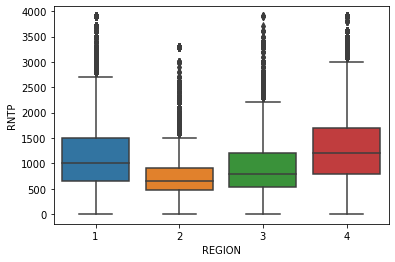

In [12]:
sns.boxplot(x="REGION", y="RNTP", data=df)

It is also interesting to look at the rents on the log scale.

[(7.0, 13.0)]

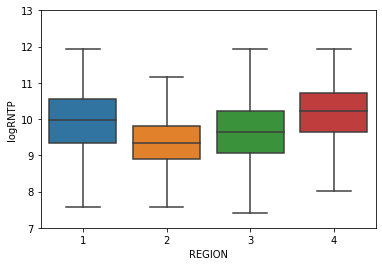

In [13]:
dx = dx.loc[dx["RNTP"] > 0, :]
dx["logRNTP"] = np.log2(dx["RNTP"])
ax = sns.boxplot(x="REGION", y="logRNTP", fliersize=0, data=dx)
ax.set(ylim=[7, 13])

Next we consider a different grouping of the households, based on the working status of the people in the household.  There are 15 codes given by the 'WORKSTAT' variable.  See the codebook for detailed descriptions of what the 15 labels mean.

[(11.0, 20.0)]

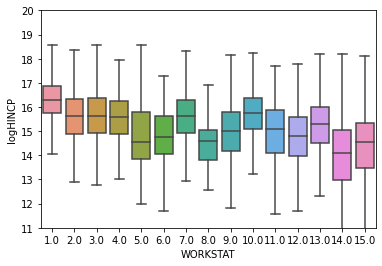

In [14]:
ax = sns.boxplot(x="WORKSTAT", y="logHINCP", fliersize=0, data=dx)
ax.set(ylim=[11, 20])

## Quantile plots

Quantile plots are an efficient way to display an entire distribution, through its quantiles.  To illustrate, we construct quantile plots for log income within each level of the 'WORKSTAT' variable.

In [15]:
p = np.linspace(0.05, 0.95, 10)
qw = dx.groupby("WORKSTAT")["logHINCP"].quantile(p).reset_index()
print(qw)

     WORKSTAT  level_1   logHINCP
0         1.0     0.05  14.785956
1         1.0     0.15  15.398744
2         1.0     0.25  15.733969
3         1.0     0.35  15.988152
4         1.0     0.45  16.194603
..        ...      ...        ...
145      15.0     0.55  14.699139
146      15.0     0.65  15.010178
147      15.0     0.75  15.358102
148      15.0     0.85  15.786856
149      15.0     0.95  16.520373

[150 rows x 3 columns]


Next we plot all of the quantile functions corresponding to the 15 WORKSTAT groups.  This is a very busy graph with a lot of overplotting.

[(10.0, 18.0)]

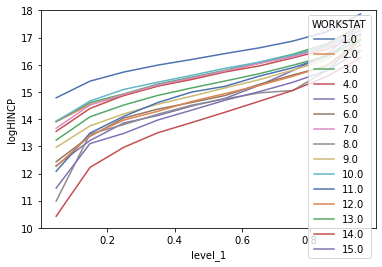

In [16]:
ax = sns.lineplot(x="level_1", y="logHINCP", hue="WORKSTAT", palette="deep", data=qw)
ax.set(ylim=[10, 18])

We can simplify the above plot by only showing a limited number of WORKSTAT groups at a time.

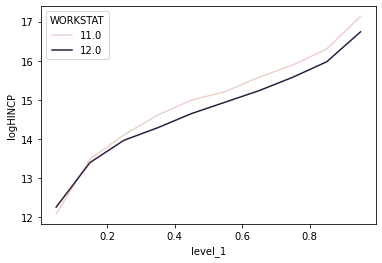

In [17]:
qw2 = qw.loc[qw["WORKSTAT"].isin([11, 12]), :]
ax = sns.lineplot(x="level_1", y="logHINCP", hue="WORKSTAT", data=qw2)

As one more illustration of quantile plots, we calculate the proportion of household income that is spent on rent, and plot the quantiles of this variable.

<ipython-input-18-8b77044c5355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz["PR"] = 12 *dz["RNTP"] / dz["HINCP"]


<AxesSubplot:xlabel='p', ylabel='PR'>

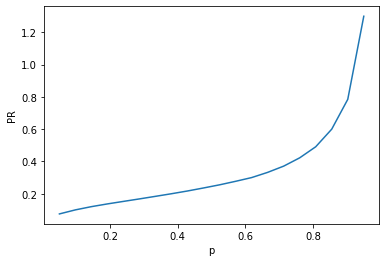

In [18]:
dz = df.loc[(df["HINCP"] > 0) & (df["RNTP"] > 0), :]
dz["PR"] = 12 *dz["RNTP"] / dz["HINCP"]
p = np.linspace(0.05, 0.95, 20)
qnt = dz["PR"].quantile(p)
qnt = pd.DataFrame(qnt)
qnt["p"] = p
sns.lineplot(x="p", y="PR", data=qnt)

A quantile/quantile plot is a more advanced way to directly compare two sets of quantiles to each other.  It is conventional in a QQ plot to plot the y=x line as a reference for comparison.

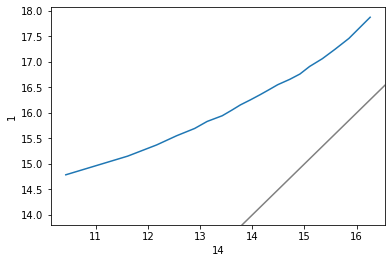

In [19]:
qw = dx.groupby("WORKSTAT")["logHINCP"].quantile(p).unstack().T
sns.lineplot(x=14, y=1, data=qw)
plt.axline((14, 14), slope=1, color="grey")

## Scatterplots and conditional means

All of the illustrations above involve assessing or comparing distributions of a single variable.  If we have multivariate data, a different set of plotting techniques can be used.  In particular, if we observe two quantitative characteristics for each unit of analysis, a natural way to visualize the data is by using a scatterplot.  Below we make a scatterplot of the log income value versus the rent values, for those people who have a non-missing positive value for both variables.

<AxesSubplot:xlabel='logHINCP', ylabel='RNTP'>

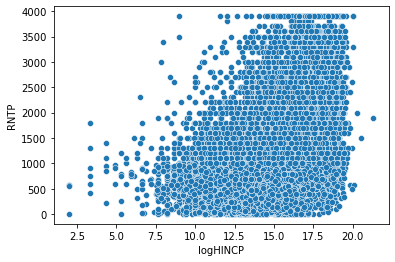

In [20]:
sns.scatterplot(x="logHINCP", y="RNTP", data=dx)

The conditional mean is a summary of a scatterplot, which shows the average value for the variable on the vertical axis for observations whose value on the horizontal axis is close to a given point.  Not surprisingly, the conditional mean for log rent paid relative to log income is increasing in income.  However, it is not linear.  At the very low end of the income range, the conditional mean of log rent increases very slowly, then it transitions to a nearly linear form once the income approaches 20,000 USD.  Note that this is a "log/log" plot, which is a common way of plotting positive values that scale in a multiplicative manner -- a fixed percentage increase in income corresponds to a fixed percentage increase in rent, except at the very low end of the income range.  Note that the slope of this relationship is less than 1 -- as income grows, a declining share of income is spent on rent.

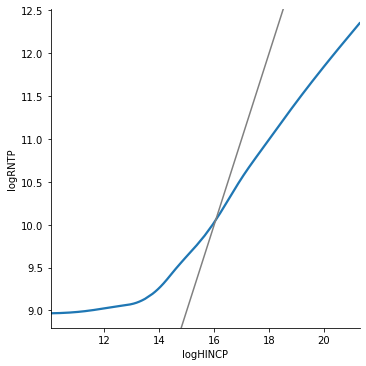

In [21]:
dy = dx.loc[dx["logHINCP"] >= 10, :]
sns.lmplot(x="logHINCP", y="logRNTP", lowess=True, scatter=False, data=dy)
plt.axline((16, 10), slope=1, color="grey")

It is also interesting to compare the conditional mean functions across relevant subgroups, here we will compare across regions.

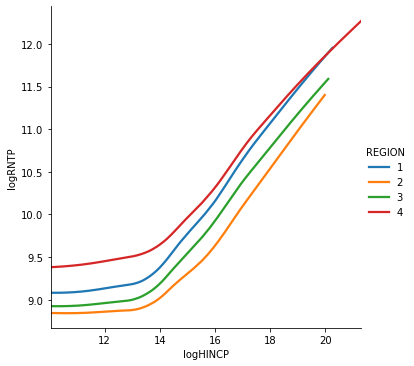

In [22]:
sns.lmplot(x="logHINCP", y="logRNTP", lowess=True, hue="REGION", scatter=False, data=dy)

Here is the same type of plot, grouping by R65 (presence of people 65 and over in the household).

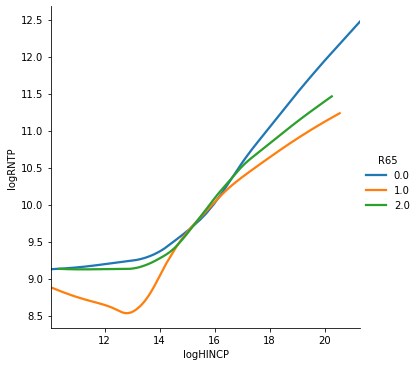

In [23]:
sns.lmplot(x="logHINCP", y="logRNTP", lowess=True, hue="R65", scatter=False, data=dy)

## Plots of nominal data

All of the plots above involve quantitative variables (except for variables like region that are used to form groups).  If we onlyu have nominal variable, and wish to understand the relationships among variables, we can use a mosaic plot.  The mosaic plot below shows that households that do not include anyone age 18 and under are relatively balanced among those having 1 or more people age 65 and over, whereas households that do include people age 18 and under are much less likely to include anyone of age 65 and over.

R65     0.0    1.0    2.0
R18                      
0.0  100275  50412  31236
1.0   63570   4076   1450


(<Figure size 432x288 with 3 Axes>,
 {('0.0', '0.0'): (0.0, 0.0, 0.7211323065097113, 0.5475444399681066),
  ('0.0', '1.0'): (0.0,
   0.5508556982462522,
   0.7211323065097113,
   0.27527110753101164),
  ('0.0', '2.0'): (0.0,
   0.8294380640554097,
   0.7211323065097113,
   0.1705619359445902),
  ('1.0', '0.0'): (0.7261074308878207,
   0.0,
   0.27389256911217935,
   0.913931437746274),
  ('1.0', '1.0'): (0.7261074308878207,
   0.9172426960244197,
   0.27389256911217935,
   0.05859972534613519),
  ('1.0', '2.0'): (0.7261074308878207,
   0.9791536796487006,
   0.27389256911217935,
   0.020846320351299283)})

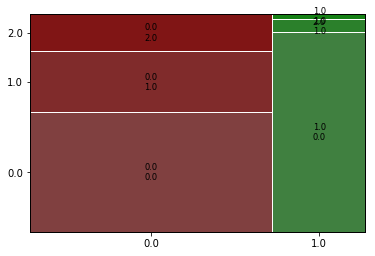

In [24]:
from statsmodels.graphics.mosaicplot import mosaic
xt = pd.crosstab(df["R18"], df["R65"])
print(xt)
mosaic(xt.stack())